## Librerías

In [17]:
import os, glob, pprint, math
import matplotlib.pyplot as plt
import numpy as np

## Funciones
Se definieron 2 funciones:
* una para limpiar tokens
* leer cada archivo e ir contando vocabulario

In [18]:
def clean_word(word):
    word = word.strip().lower()
    word = ''.join(filter(str.isalpha, word))
    if (len(word)>1): # remove words with less than 2 letters
        return word
    return None

def file_to_data(file_path, skip_header=True):
    vocabulary_length = 0
    tokens = set()
    data_points = []
    with open(file_path, errors='ignore', encoding='utf-8') as file_obj:
        index = 0
        for line in file_obj:
            if (skip_header and index == 0):
                index += 1
                continue
            words = line.split(' ')
            for word in words:
                word = clean_word(word)
                if (word != None):
                    tokens.add(word)
                    vocabulary_length +=1
                    # print(f'word: {word}, size: {[vocabulary_length, len(tokens)]}')
                    data_points.append([vocabulary_length, len(tokens)])
    return np.array(data_points)

## Obtener listado de archivos

In [19]:
path = os.getcwd()
if (path.endswith('code')):
    path = path[:-5] # remove '/ code'
data_path = f'{os.path.sep}data'
files = [f for f in glob.glob(f'{path}{data_path}{os.path.sep}*.csv')]
files

['C:\\Users\\mlguzmanc\\Desktop\\Otros\\UVG\\cmiads-tmnlp-h2\\data\\tokens_100.csv',
 'C:\\Users\\mlguzmanc\\Desktop\\Otros\\UVG\\cmiads-tmnlp-h2\\data\\tokens_1000.csv',
 'C:\\Users\\mlguzmanc\\Desktop\\Otros\\UVG\\cmiads-tmnlp-h2\\data\\tokens_10000.csv',
 'C:\\Users\\mlguzmanc\\Desktop\\Otros\\UVG\\cmiads-tmnlp-h2\\data\\tokens_100000.csv',
 'C:\\Users\\mlguzmanc\\Desktop\\Otros\\UVG\\cmiads-tmnlp-h2\\data\\tokens_1000000.csv',
 'C:\\Users\\mlguzmanc\\Desktop\\Otros\\UVG\\cmiads-tmnlp-h2\\data\\tokens_1500000.csv',
 'C:\\Users\\mlguzmanc\\Desktop\\Otros\\UVG\\cmiads-tmnlp-h2\\data\\tokens_5000.csv',
 'C:\\Users\\mlguzmanc\\Desktop\\Otros\\UVG\\cmiads-tmnlp-h2\\data\\tokens_50000.csv',
 'C:\\Users\\mlguzmanc\\Desktop\\Otros\\UVG\\cmiads-tmnlp-h2\\data\\tokens_500000.csv']

## Graficar resultados
Itera sobre todos los archivos calculando el vocabulario y hace una gráfica por archivo

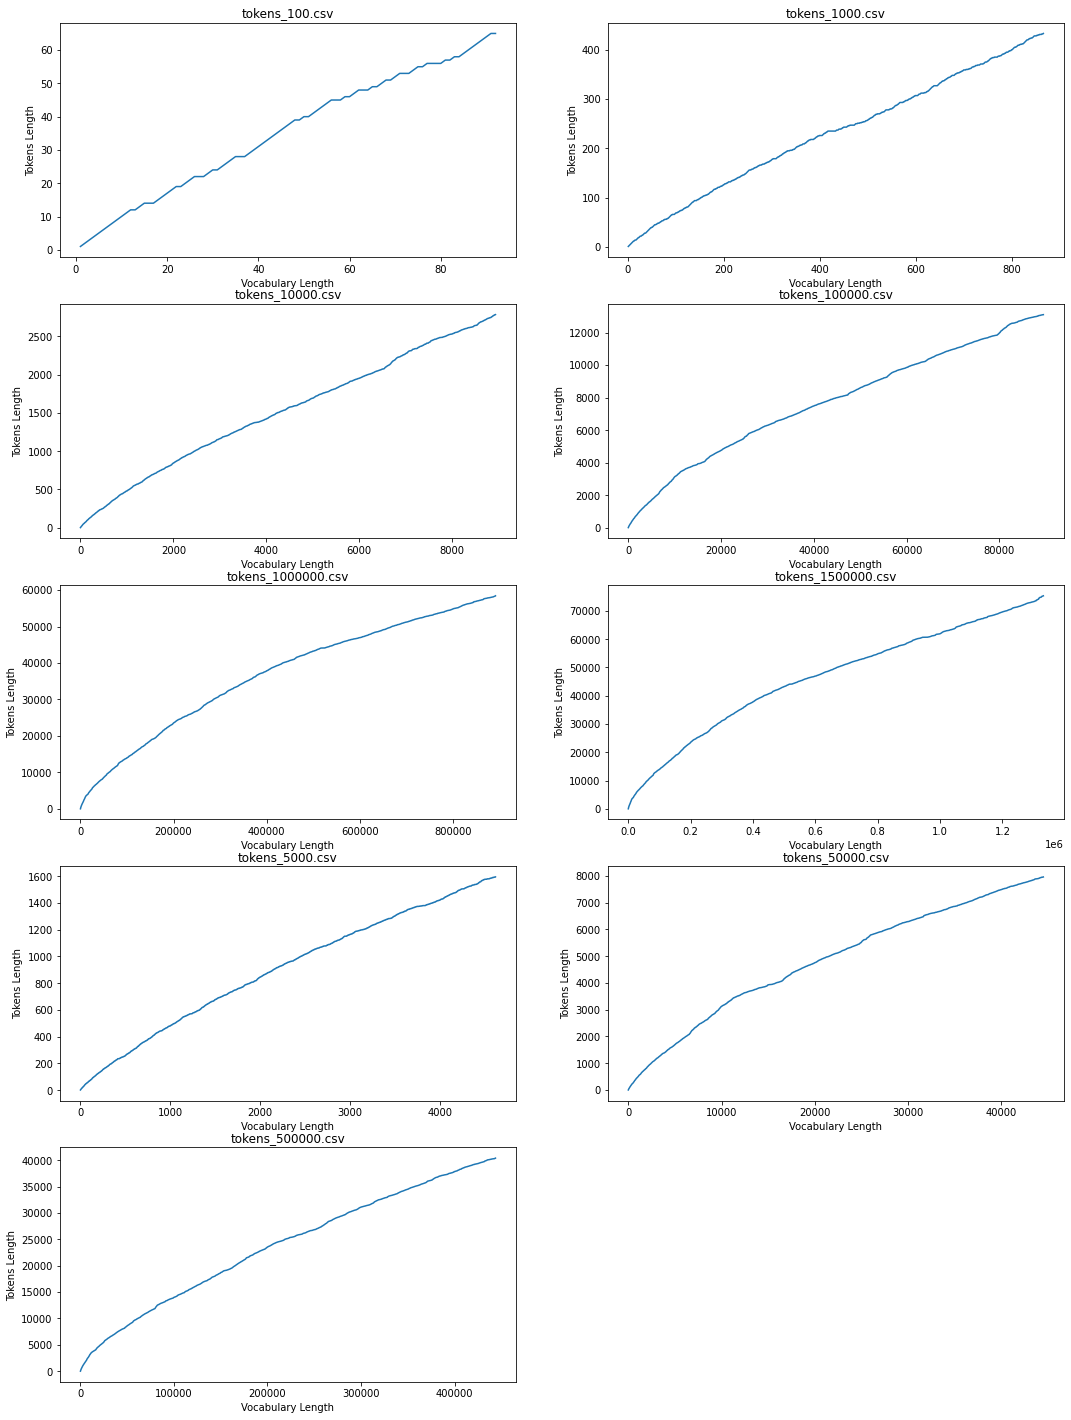

In [20]:
columns = 2
rows = math.ceil(len(files)/columns)
plt.subplots(figsize=(18, 25))
for index in range(len(files)):
    file = files[index]
    file_data = file_to_data(file)
    label = file.split(os.path.sep)[-1]
    plt.subplot(rows, columns, index+1)
    plt.plot(file_data[...,0], file_data[...,1])
    plt.title(label)
    plt.xlabel('Vocabulary Length')
    plt.ylabel('Tokens Length')
plt.show()

## Ejemplo de artículos iterados
A manera de ejemplo, para el archivo de 1.5M de tokens se iteraron los siguientes artículos de wikipedia:

In [21]:
print('Artículos scrapeados en archivo de 1.5M tokens:')
file_path = f'{path}{data_path}{os.path.sep}tokens_1500000.csv'
with open(file_path, errors='ignore', encoding='utf-8') as file_obj:
    lines = 0
    tokens_acum = 0
    next(file_obj, None) # skip the header
    for line in file_obj:
        lines += 1
        words = line.split(' ')
        tokens_acum += len(words)
        print('\t* '+line.split(". ")[0].replace('\"',''),f'(tokens: {len(words)}, acumulado: {tokens_acum})')
    print(lines,'artículos')

Artículos scrapeados en archivo de 1.5M tokens:
	* Tecnología (tokens: 8361, acumulado: 8361)
	* Turbina de vapor (tokens: 1185, acumulado: 9546)
	* Griego antiguo (tokens: 3597, acumulado: 13143)
	* Técnica (tokens: 659, acumulado: 13802)
	* Habilidad (tokens: 6450, acumulado: 20252)
	* Método científico (tokens: 9292, acumulado: 29544)
	* Proceso (tokens: 217, acumulado: 29761)
	* Bien económico (tokens: 3123, acumulado: 32884)
	* Sector servicios (tokens: 946, acumulado: 33830)
	* Investigación (tokens: 2086, acumulado: 35916)
	* Conocimiento (tokens: 8851, acumulado: 44767)
	* Máquina (tokens: 832, acumulado: 45599)
	* Sistema (tokens: 1148, acumulado: 46747)
	* Entrada (tokens: 256, acumulado: 47003)
	* Salida (informática) (tokens: 284, acumulado: 47287)
	* Sistema tecnológico (tokens: 1759, acumulado: 49046)
	* Economía (tokens: 4949, acumulado: 53995)
	* Globalización (tokens: 11075, acumulado: 65070)
	* Externalidad (tokens: 7364, acumulado: 72434)
	* Contaminación (tokens: 20

	* Lluvia ácida (tokens: 1316, acumulado: 1141404)
	* Especie en peligro de extinción (tokens: 3950, acumulado: 1145354)
	* Desertificación (tokens: 1590, acumulado: 1146944)
	* Desarrollo sostenible (tokens: 11001, acumulado: 1157945)
	* Ludismo (tokens: 2006, acumulado: 1159951)
	* Beneficio económico (tokens: 1822, acumulado: 1161773)
	* Investigación médica (tokens: 4125, acumulado: 1165898)
	* Arma (tokens: 6101, acumulado: 1171999)
	* Convenios de Ginebra (tokens: 1658, acumulado: 1173657)
	* Tecnologías emergentes (tokens: 689, acumulado: 1174346)
	* 2002 (tokens: 7809, acumulado: 1182155)
	* Emergencia (filosofía) (tokens: 4997, acumulado: 1187152)
	* Convergencia tecnológica (tokens: 2437, acumulado: 1189589)
	* Tecnología disruptiva (tokens: 935, acumulado: 1190524)
	* Nanotecnología (tokens: 9852, acumulado: 1200376)
	* Biotecnología (tokens: 4199, acumulado: 1204575)
	* Tecnologías de la información y la comunicación (tokens: 9163, acumulado: 1213738)
	* Ciencia cognitiva (

Artículo | Tokens Artículo | Tokens Acumulados
--|--|--
Tecnología | 8361 | 8361
Turbina de vapor | 1185 | 9546
Griego antiguo | 3597 | 13143
Técnica | 659 | 13802
Habilidad | 6450 | 20252
Método científico | 9292 | 29544
Proceso | 217 | 29761
Bien económico | 3123 | 32884
Sector servicios | 946 | 33830
Investigación | 2086 | 35916
Conocimiento | 8851 | 44767
Máquina | 832 | 45599
Sistema | 1148 | 46747
Entrada | 256 | 47003
Salida (informática) | 284 | 47287
Sistema tecnológico | 1759 | 49046
Economía | 4949 | 53995
Globalización | 11075 | 65070
Externalidad | 7364 | 72434
Contaminación | 20133 | 92567
Recurso natural | 1562 | 94129
Medio ambiente natural | 8176 | 102305
Sostenibilidad | 2784 | 105089
Desigualdad social | 6946 | 112035
Innovación | 4086 | 116121
Valor (axiología) | 1316 | 117437
Ética de la tecnología | 3078 | 120515
Eficiencia | 405 | 120920
Bioética | 5061 | 125981
Estudios de ciencia, tecnología y sociedad | 3908 | 129889
Filosofía de la tecnología | 3520 | 133409
Condición humana | 456 | 133865
Neoludismo | 2305 | 136170
Anarquismo primitivista | 3293 | 139463
Ideología | 5815 | 145278
Transhumanismo | 12560 | 157838
Tecnoprogresismo | 2399 | 160237
Historia de la tecnología | 3454 | 163691
Rueda | 4323 | 168014
Invento | 654 | 168668
Herramienta | 2891 | 171559
Sistema económico | 4017 | 175576
Crecimiento económico | 4310 | 179886
Prehistoria | 14328 | 194214
Domesticación del fuego | 4612 | 198826
Revolución neolítica | 4380 | 203206
Historia de la ciencia | 21132 | 224338
Imprenta | 6074 | 230412
Teléfono | 4234 | 234646
Internet | 10702 | 245348
Comunicación | 4972 | 250320
Funciones de la tecnología | 1372 | 251692
Hedonismo | 6687 | 258379
Marca (registro) | 1359 | 259738
Creencia | 7385 | 267123
Estética | 4085 | 271208
Símbolo | 3358 | 274566
Belleza | 4129 | 278695
Estatus social | 3743 | 282438
Joya | 6280 | 288718
Catedral | 1159 | 289877
Palacio | 6666 | 296543
Rascacielos | 3714 | 300257
Atrio | 1610 | 301867
Atentados del 11 de septiembre de 2001 | 21041 | 322908
World Trade Center (1973-2001) | 13950 | 336858
Nueva York | 22069 | 358927
Organización Mundial del Comercio | 3704 | 362631
Homo sapiens | 7633 | 370264
Astronáutica | 8165 | 378429
Programa Apolo | 4096 | 382525
John F | 15279 | 397804
Guerra Fría | 20450 | 418254
Carrera espacial | 8626 | 426880
Pirámides de Egipto | 2041 | 428921
Experimentación | 396 | 429317
Artesanía | 2760 | 432077
Industria | 4591 | 436668
Sistema de suministro eléctrico | 1124 | 437792
Energía | 5903 | 443695
Información | 4136 | 447831
Martillo | 912 | 448743
Aguja | 1508 | 450251
Máquina simple | 4761 | 455012
Fuego | 4369 | 459381
Instrumento quirúrgico | 1555 | 460936
Instrumentación electrónica | 912 | 461848
Instrumento de medición | 631 | 462479
Instrumentos de navegación náutica | 782 | 463261
Instrumentos de vuelo | 3325 | 466586
Máquina herramienta | 3853 | 470439
Computadora | 4633 | 475072
Invento | 654 | 475726
Artefacto | 198 | 475924
Función técnica | 259 | 476183
Desalinización | 3542 | 479725
Agua potable | 6468 | 486193
Mar Muerto | 3727 | 489920
Temperatura | 4977 | 494897
Fuente de energía | 4338 | 499235
Especificación | 88 | 499323
Material | 632 | 499955
Mano de obra | 1293 | 501248
Coste | 1648 | 502896
Teoría del valor como costo de producción | 822 | 503718
Ósmosis | 4970 | 508688
Diseño | 1961 | 510649
Ensayo y error | 418 | 511067
Ingeniería | 7132 | 518199
Planta (arquitectura) | 3482 | 521681
Diagrama | 551 | 522232
Ensayo de materiales | 2371 | 524603
Prototipo | 1439 | 526042
Automóvil | 3997 | 530039
Avión | 3814 | 533853
Simulación | 2546 | 536399
Modelado numérico | 381 | 536780
Modelo matemático | 1806 | 538586
Aerodinámica | 695 | 539281
Túnel de viento | 3096 | 542377
Isaac Asimov | 6759 | 549136
Thomas Alva Edison | 4387 | 553523
Creatividad | 6104 | 559627
Edward de Bono | 665 | 560292
Allen Newell | 902 | 561194
Herbert Alexander Simon | 4343 | 565537
Tecnología adecuada | 4519 | 570056
Ghana | 11702 | 581758
Medio ambiente natural | 8176 | 589934
País en vías de desarrollo | 1952 | 591886
Medio rural | 2389 | 594275
Alta tecnología | 750 | 595025
Ernst Friedrich Schumacher | 1463 | 596488
Lo pequeño es hermoso | 743 | 597231
Salud | 5328 | 602559
Mecanización | 1488 | 604047
Recurso | 390 | 604437
Industrialización | 1442 | 605879
Materia prima | 1331 | 607210
Espacio natural | 1339 | 608549
Bioconstrucción | 2729 | 611278
Adobe | 2570 | 613848
Clima | 6674 | 620522
Mantenimiento | 866 | 621388
Letrina | 1042 | 622430
Naturaleza | 6920 | 629350
Marshall McLuhan | 5124 | 634474
Cultura | 11854 | 646328
Sociedad | 5164 | 651492
Impacto tecnológico | 2946 | 654438
Impacto ambiental | 16699 | 671137
Ética | 8569 | 679706
Epistemología | 5856 | 685562
Servicio (economía) | 1481 | 687043
Ingreso | 527 | 687570
Joseph Alois Schumpeter | 7514 | 695084
Ciclo económico | 6763 | 701847
Nikolái Kondrátiev | 802 | 702649
Henry Ford | 6031 | 708680
Monopolio | 8321 | 717001
Minería | 10582 | 727583
Agricultura | 8798 | 736381
Ganadería | 7309 | 743690
Industria alimentaria | 1443 | 745133
Industria automotriz | 2139 | 747272
Ropa | 4661 | 751933
Edificio | 663 | 752596
Medio de comunicación | 2945 | 755541
Tecnología sanitaria | 598 | 756139
Electricidad | 7251 | 763390
Basura | 5110 | 768500
Carretera | 2267 | 770767
Gas natural | 2153 | 772920
Radio (medio de comunicación) | 4750 | 777670
Televisión | 12557 | 790227
Órbita | 4871 | 795098
Satélite artificial | 4537 | 799635
Circuito integrado | 2906 | 802541
Telefonía móvil | 3669 | 806210
Comercio | 4944 | 811154
Mercancía | 2326 | 813480
Transporte fluvial | 789 | 814269
Transporte marítimo | 2115 | 816384
Transporte terrestre | 1683 | 818067
Transporte aéreo | 2010 | 820077
Transporte terrestre | 1683 | 821760
Puerto | 1550 | 823310
Puente | 4512 | 827822
Aeropuerto | 5605 | 833427
Fletamento por viaje | 366 | 833793
Eficiencia económica | 6356 | 840149
Infraestructura y superestructura | 562 | 840711
Capitalismo | 10129 | 850840
Trabajo (economía) | 457 | 851297
Artesano | 524 | 851821
Taylorismo | 2348 | 854169
Frederick Winslow Taylor | 1852 | 856021
Manufactura | 4297 | 860318
Productividad | 5619 | 865937
Clase obrera | 1481 | 867418
Capital (economía) | 7880 | 875298
Karl Marx | 24377 | 899675
Plusvalor | 2129 | 901804
Toyotismo | 690 | 902494
Flexibilidad laboral | 1503 | 903997
Fordismo | 5271 | 909268
Producción en cadena | 518 | 909786
Charles Chaplin | 9338 | 919124
Tiempos modernos | 1097 | 920221
Robot industrial | 844 | 921065
Máquina de coser | 2925 | 923990
Toyota | 6643 | 930633
Soldadura | 7818 | 938451
Chasis | 411 | 938862
Matriz insumo-producto | 96 | 938958
Modelo input-output | 1351 | 940309
Wassily Leontief | 853 | 941162
Sector económico | 839 | 942001
Sector primario | 461 | 942462
Pesca comercial | 1459 | 943921
Silvicultura | 1848 | 945769
Sector secundario | 1195 | 946964
Sector energético | 98 | 947062
Construcción | 1745 | 948807
Transporte | 4979 | 953786
Turismo | 18567 | 972353
Educación | 8432 | 980785
Finanzas | 2386 | 983171
Administración pública | 3077 | 986248
Sector salud | 672 | 986920
Formación profesional | 1578 | 988498
Publicidad | 6853 | 995351
Cigarrillo | 5045 | 1000396
Vino | 23456 | 1023852
Medicina | 6296 | 1030148
Sistema sociotécnico | 709 | 1030857
Cosmovisión | 2248 | 1033105
Vere Gordon Childe | 865 | 1033970
Telecomunicación | 24757 | 1058727
Impacto ambiental | 16699 | 1075426
Instituto Goddard de Estudios Espaciales | 1236 | 1076662
NASA | 14359 | 1091021
Parque natural | 280 | 1091301
Deforestación | 16490 | 1107791
Calentamiento global | 28541 | 1136332
Agujero de la capa de ozono | 3756 | 1140088
Lluvia ácida | 1316 | 1141404
Especie en peligro de extinción | 3950 | 1145354
Desertificación | 1590 | 1146944
Desarrollo sostenible | 11001 | 1157945
Ludismo | 2006 | 1159951
Beneficio económico | 1822 | 1161773
Investigación médica | 4125 | 1165898
Arma | 6101 | 1171999
Convenios de Ginebra | 1658 | 1173657
Tecnologías emergentes | 689 | 1174346
2002 | 7809 | 1182155
Emergencia (filosofía) | 4997 | 1187152
Convergencia tecnológica | 2437 | 1189589
Tecnología disruptiva | 935 | 1190524
Nanotecnología | 9852 | 1200376
Biotecnología | 4199 | 1204575
Tecnologías de la información y la comunicación | 9163 | 1213738
Ciencia cognitiva | 2630 | 1216368
Robótica | 2274 | 1218642
Inteligencia artificial | 7136 | 1225778
Innovación | 4086 | 1229864
Bill Joy | 1019 | 1230883
Tercera Revolución Industrial | 1389 | 1232272
Nick Bostrom | 3719 | 1235991
Extinción humana | 4389 | 1240380
Controversia sobre la energía nuclear | 4718 | 1245098
Derecho a poseer armas | 7276 | 1252374
Francis Fukuyama | 2273 | 1254647
Jacques Ellul | 2116 | 1256763
La sociedad industrial y su futuro | 785 | 1257548
Estudios de ciencia, tecnología y género | 1201 | 1258749
Interdisciplinariedad | 1056 | 1259805
Ciencia | 11900 | 1271705
Perspectiva de género | 1811 | 1273516
Estudios de ciencia, tecnología y sociedad | 3908 | 1277424
Género (ciencias sociales) | 3949 | 1281373
Marginación | 3461 | 1284834
Mujeres en campos de CTIM | 12129 | 1296963
Techo de cristal | 1064 | 1298027
Artefacto | 198 | 1298225
División sexual del trabajo | 605 | 1298830
Centro para el Estudio del Riesgo Existencial | 699 | 1299529
Dataísmo | 3363 | 1302892
Difusionismo (arqueología) | 1697 | 1304589
Educación tecnológica | 4417 | 1309006
Evolución tecnológica | 1520 | 1310526
Historia del registro del sonido | 11034 | 1321560
Investigación y desarrollo | 1223 | 1322783
Investigación, desarrollo e innovación | 566 | 1323349
Las dos culturas | 960 | 1324309
NIMBY | 1519 | 1325828
Nivel de madurez tecnológica | 2032 | 1327860
Retorno tecnológico | 354 | 1328214
Tecnociencia | 1676 | 1329890
ISBN | 1897 | 1331787
OCLC | 569 | 1332356
Identificador de objeto digital | 621 | 1332977
Ayuda:Errores en las referencias | 1281 | 1334258
André Leroi-Gourhan | 3061 | 1337319
Wayback Machine | 894 | 1338213
OCLC | 569 | 1338782
Theodore Kaczynski | 4109 | 1342891
International Standard Serial Number | 843 | 1343734
Wikimedia Commons | 982 | 1344716
Wikinoticias | 1073 | 1345789
Wikiquote | 915 | 1346704
Wikcionario | 610 | 1347314
Control de autoridades | 1145 | 1348459
Wikidata | 1532 | 1349991
Biblioteca Nacional de Francia | 2382 | 1352373
Gemeinsame Normdatei | 323 | 1352696
Library of Congress Control Number | 371 | 1353067
Archivos Nacionales y Administración de Documentos | 1788 | 1354855
Art & Architecture Thesaurus | 217 | 1355072
Enciclopedia Británica | 13096 | 1368168
Medical Subject Headings | 467 | 1368635
Descriptores en Ciencias de la Salud | 462 | 1369097
Alemania | 18483 | 1387580
Turbomáquina | 5300 | 1392880
Vapor (estado) | 891 | 1393771
Energía mecánica | 13720 | 1407491
Cantidad de movimiento | 3377 | 1410868
Rodete | 247 | 1411115
Álabe | 535 | 1411650
Ciclo termodinámico | 612 | 1412262
Estado de agregación de la materia | 4340 | 1416602
Ciclo de Rankine | 1851 | 1418453
Caldera (máquina) | 1885 | 1420338
Generador eléctrico | 3242 | 1423580
Charles Algernon Parsons | 1960 | 1425540
Dinamo (generador eléctrico) | 1266 | 1426806
Grado de reacción | 321 | 1427127
Entalpía | 1852 | 1428979
Leonhard Euler | 7757 | 1436736
Trabajo (física) | 2421 | 1439157
Papel | 8777 | 1447934
Pulpa de celulosa | 1128 | 1449062
Turbina de gas | 1098 | 1450160
Motor de combustión interna alternativo | 2430 | 1452590
Motor Wankel | 5433 | 1458023
Motor diésel | 1563 | 1459586
Motor radial | 2156 | 1461742
Motor rotativo | 3847 | 1465589
Biblioteca Nacional de la Dieta | 2620 | 1468209
Biblioteca Nacional de la República Checa | 1297 | 1469506
Mediterráneo oriental | 2016 | 1471522
Lengua muerta | 3474 | 1474996
Humanidades | 1360 | 1476356
Familia de lenguas | 4539 | 1480895
Lenguas indoeuropeas | 4427 | 1485322
Hipótesis grecoarmenia | 853 | 1486175
Lenguas griegas | 1527 | 1487702
Dialecto | 4141 | 1491843
Griego ático | 624 | 1492467
Griego jónico | 727 | 1493194
Griego dórico | 1003 | 1494197
Griego eólico | 512 | 1494709
Dialectos del griego antiguo | 700 | 1495409
Sistema de escritura | 3957 | 1499366
Alfabeto griego | 634 | 1500000